**SETTING UP THE ENVIRONMENT AND STORAGE**

We need to mount our google drive as the file storage in which we access the files we will upload to our model.

In [2]:
# ONLY OPEN WHEN IT IS RUN ON GOOGLE COLAB
# PLEASE IGNORE IF YOU RUN ON JUPYTER SAYING THAT "Notebook JSON is invalid", it was run using GOOGLE COLAB
# from google.colab import drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ONLY OPEN WHEN IT IS RUN ON GOOGLE COLAB
# %cd /content/drive/MyDrive/ml_files/
# !ls

/content/drive/MyDrive/ml_files
 fars.csv   Tweets_dev.csv	   Tweets_test.csv
 fars.dat  'Tweets_test (1).csv'   Tweets_train.csv


Installing the pandas profiling to our environment

In [4]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 22.7 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.1 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=9b2f2227ab595191174d4c5b596c20f8dfae72bcd9d3df8d91b51bb7ecb6ae11
  Stored in directory: /tmp/pip-ephem-wheel-cache-roe_xury/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

**GETTING READY WITH OUR DATASET**

Reading our fars.csv file (FARS file is a collection of statistics of US road traffic accidents). We need the data to build a model that predicts the severity of the accident. 

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport 

# FROM GOOGLE COLAB
# data = pd.read_csv('fars.csv')

# FROM JUPYTER
data = pd.read_csv('ml_files/fars.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

Then, we perform EDA by generating a profiling report to see the features and the correlation between features and our target. 

In [6]:
profile = ProfileReport(data, title='The Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**MISSING VALUES OBSERVATION**

Let's check any missing values:

In [7]:
data.isnull().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE                         0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

In [8]:
data.isnull().values.any()

False

There is no missing value (as we assume as the null values) in our dataset. However, based on the profiling report we generated, we've seen some uncategorical values. For example, we have:

1.   *Unknown* in SEX
2.   *Unknown_Type_of_Non-Motorist* and *Unknown_Occupant_Type_in_a_Motor_Vehicle_in_Transport* in PERSON_TYPE

1.   *Unknown* in SEATING_POSITION
2.   *Unknown* and *Restraint_Used_-_Type_Unknown* in RESTRAINT_SYSTEM-USE

1.   *Unknown_(If_Airbag_Available)* in AIR_BAG_AVAILABILITY/DEPLOYMENT
2.   *Unknown* in EJECTION

1.   *Unknown* in EXTRICATION
2.   *Unknown * in NON_MOTORIST_LOCATION

1.   *Unknown_(Police_Reported)* in POLICE_REPORTED_ALCOHOL_INVOLVEMENT
2.   *Reported_Unknown* in POLICE-REPORTED_DRUG_INVOLVEMENT

1.   *Unknown* in TAKEN_TO_HOSPITAL
2.   *Unknown* in RELATED_FACTOR_(1)-PERSON_LEVEL

1.   *Unknown* in RELATED_FACTOR_(2)-PERSON_LEVEL
2.  *Unknown* in RELATED_FACTOR_(3)-PERSON_LEVEL

1.   *Unknown* in Injury_Severity

1.   *Not_a_Fatality_(Not_Applicable)* and *Unknown* in HISPANIC_ORIGIN

1.   *Not_a_Fatality_(Not_Applicable)*, *Unknown* in RACE





















**FEATURE SELECTION**

Removing features that have a high percentage of missing values is one of the feature selection techniques that can improve our model accuracy. Machine Learning models learn from our dataset and it's hard to learn from features which contain too many missing values.

We're going to remove the features 'HISPANIC_ORIGIN' and 'RACE' as most of these values are either Not_a_fatality_(Not_Applicable), Unknown or Other Values.

We're going to remove the feature EJECTION_PATH as it's highly correlated with EJECTION after looking at our heatmap as we know this as multicolinearity and pairwise correlation. It can help us to reduce the dimensionality of our pandas data.

We can also drop the features which has a very low correlation with our target which is Injury_Severity. Therefore, we can drop NON_MOTORIST_LOCATION, ALCOHOL_TEST_TYPE, ALCOHOL_TEST_RESULT, METHOD_ALCOHOL_DETERMINATION, DRUG_TEST_TYPE, DRUG_TEST_TYPE_(2_of_3), DRUG_TEST_TYPE_(3_of_3), DRUG_TEST_RESULTS_(1_of_3), DRUG_TEST_RESULTS_(2_of_3), DRUG_TEST_RESULTS_(3_of_3), METHOD_OF_DRUG_DETERMINATION, 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL'

To remove a feature we drop the appropriate columns from our dataframe.

In [9]:
dataClean = data.drop(columns=['HISPANIC_ORIGIN', 'RACE', 'EJECTION_PATH', 'NON_MOTORIST_LOCATION', 'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT', 'METHOD_ALCOHOL_DETERMINATION', 'DRUG_TEST_TYPE', 'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)', 'METHOD_OF_DRUG_DETERMINATION', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL'])
dataClean

CASE_STATE  AGE     SEX                                PERSON_TYPE  \
0         Alabama   34    Male                                     Driver   
1         Alabama   20    Male                                     Driver   
2         Alabama   43    Male                                     Driver   
3         Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50    Male                                     Driver   
...           ...  ...     ...                                        ...   
100963    Wyoming   10  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61    Male                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
2       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
3                     Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
4       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
...                                       ...                       ...   
100963                Second_Seat_-_Left_Side     Lap_and_Shoulder_Belt   
100964               Second_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
100965                   Second_Seat_-_Middle                  Lap_Belt   
100966                   Second_Seat_-_Middle                  Lap_Belt   
100967  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   

                         AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
0       Air_Bag_Available_but_Not_Deployed_for_this_Seat  Totally_Ejected   
1                            Deployed_Air_Bag_from_Front  Totally_Ejected   
2                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
3                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
4                            Deployed_Air_Bag_from_Front      Not_Ejected   
...                                                  ...              ...   
100963               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100964               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100965               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100966               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100967               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   

           EXTRICATION POLICE_REPORTED_ALCOHOL_INVOLVEMENT  \
0       Not_Extricated              Yes_(Alcohol_Involved)   
1       Not_Extricated           No_(Alcohol_Not_Involved)   
2           Extricated           No_(Alcohol_Not_Involved)   
3           Extricated                        Not_reported   
4       Not_Extricated              Yes_(Alcohol_Involved)   
...                ...                                 ...   
100963  Not_Extricated           No_(Alcohol_Not_Involved)   
100964  Not_Extricated           No_(Alcohol_Not_Involved)   
100965  Not_Extricated           No_(Alcohol_Not_Involved)   
100966  Not_Extricated           No_(Alcohol_Not_Involved)   
100967  Not_Extricated           Unknown_(Police_Reported)   

       POLICE-REPORTED_DRUG_INVOLVEMENT TAKEN_TO_HOSPITAL      Injury_Severity  
0                      Reported_Unknown                No         Fatal_Injury  
1                              No_Drugs                No         Fatal_Injury  
2                              No_Drugs                No         Fatal_Injury  
3                          Not_Reported               Yes  Incapaciting_Injury  
4                      Reported_Unknown               Yes         Fatal_Injury  
...                      

**REPLACING THE UNKNOWN VALUES**

Let's assume the unknow gender as female since we've got lots of male pieces of data in our dataframe.

In [10]:
# SEX
dataClean['SEX'].replace(['Unknown'], ['Female'], inplace=True)
dataClean['SEX'].value_counts()

Male      65740
Female    35228
Name: SEX, dtype: int64

Now, let's do the same to the other features

In [11]:
# PERSON_TYPE
dataClean['PERSON_TYPE'].replace(['Unknown_Occupant_Type_in_a_Motor_Vehicle_in_Transport'], ['Passenger_of_a_Motor_Vehicle_in_Transport'], inplace=True)
dataClean['PERSON_TYPE'].replace(['Unknown_Type_of_Non-Motorist'], ['Pedestrian'], inplace=True)

# SEATING_POSITION
dataClean['SEATING_POSITION'].replace(['Unknown'], ['Front_Seat_-_Right_Side'], inplace=True)

# RESTRAINT_SYSTEM-USE
dataClean['RESTRAINT_SYSTEM-USE'].replace(['Unknown'], ['Lap_Belt'], inplace=True)
dataClean['RESTRAINT_SYSTEM-USE'].replace(['Restraint_Used_-_Type_Unknown'], ['Shoulder_Belt  '], inplace=True)

# AIR_BAG_AVAILABILITY/DEPLOYMENT
dataClean['AIR_BAG_AVAILABILITY/DEPLOYMENT'].replace(['Unknown_(If_Airbag_Available)'], ['Air_Bag_Available_but_Not_Deployed_for_this_Seat'], inplace=True)
dataClean['AIR_BAG_AVAILABILITY/DEPLOYMENT'].replace(['Air_Bad_Available-Deployment_Not_Known_for_this_Seat'], ['Deployed_Air_Bag_Multiple_Directions'], inplace=True)
dataClean['AIR_BAG_AVAILABILITY/DEPLOYMENT'].replace(['Deployed_Air_Bag_Direction_Unknown'], ['Deployed_Air_Bag_from_Side'], inplace=True)

# EJECTION
dataClean['EJECTION'].replace(['Unknown'], ['Partially_Ejected'], inplace=True)

# EXTRICATION
dataClean['EXTRICATION'].replace(['Unknown'], ['Extricated'], inplace=True)

# POLICE_REPORTED_ALCOHOL_INVOLVEMENT
dataClean['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'].replace(['Unknown_(Police_Reported)'], ['Yes_(Alcohol_Involved)'], inplace=True)

# POLICE-REPORTED_DRUG_INVOLVEMENT
dataClean['POLICE-REPORTED_DRUG_INVOLVEMENT'].replace(['Reported_Unknown'], ['Drugs_Involved'], inplace=True)

# TAKEN_TO_HOSPITAL
dataClean['TAKEN_TO_HOSPITAL'].replace(['Unknown'], ['No'], inplace=True)

# Injury_Severity
dataClean['Injury_Severity'].replace(['Unknown'], ['Possible_Injury'], inplace=True)
dataClean['Injury_Severity'].replace(['Injured_Severity_Unknown'], ['Possible_Injury'], inplace=True)
dataClean['Injury_Severity'].value_counts()

Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    9874
Died_Prior_to_Accident                9
Name: Injury_Severity, dtype: int64

**Implement One Hot Encoding**

The feature 'sex' is a catagorical feature and needs to be converted into a One Hot Encoded set of features. First we use get_dummies() to create a One Hot Encoded version of the feature. But this looses all the other features so we need to join it back to the original data and delete the original feature.

In [12]:
sexOHE = pd.get_dummies(dataClean['SEX'], prefix='SEX')
dataClean = dataClean.join(sexOHE)
dataClean = dataClean.drop(columns=['SEX'])
dataClean

CASE_STATE  AGE                                PERSON_TYPE  \
0         Alabama   34                                     Driver   
1         Alabama   20                                     Driver   
2         Alabama   43                                     Driver   
3         Alabama   38  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50                                     Driver   
...           ...  ...                                        ...   
100963    Wyoming   10  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
2       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
3                     Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
4       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
...                                       ...                       ...   
100963                Second_Seat_-_Left_Side     Lap_and_Shoulder_Belt   
100964               Second_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
100965                   Second_Seat_-_Middle                  Lap_Belt   
100966                   Second_Seat_-_Middle                  Lap_Belt   
100967  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   

                         AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
0       Air_Bag_Available_but_Not_Deployed_for_this_Seat  Totally_Ejected   
1                            Deployed_Air_Bag_from_Front  Totally_Ejected   
2                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
3                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
4                            Deployed_Air_Bag_from_Front      Not_Ejected   
...                                                  ...              ...   
100963               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100964               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100965               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100966               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100967               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   

           EXTRICATION POLICE_REPORTED_ALCOHOL_INVOLVEMENT  \
0       Not_Extricated              Yes_(Alcohol_Involved)   
1       Not_Extricated           No_(Alcohol_Not_Involved)   
2           Extricated           No_(Alcohol_Not_Involved)   
3           Extricated                        Not_reported   
4       Not_Extricated              Yes_(Alcohol_Involved)   
...                ...                                 ...   
100963  Not_Extricated           No_(Alcohol_Not_Involved)   
100964  Not_Extricated           No_(Alcohol_Not_Involved)   
100965  Not_Extricated           No_(Alcohol_Not_Involved)   
100966  Not_Extricated           No_(Alcohol_Not_Involved)   
100967  Not_Extricated              Yes_(Alcohol_Involved)   

       POLICE-REPORTED_DRUG_INVOLVEMENT TAKEN_TO_HOSPITAL  \
0                        Drugs_Involved                No   
1                              No_Drugs                No   
2                              No_Drugs                No   
3                          Not_Reported               Yes   
4                        Drugs_Involved               Yes   
...                                 ...               ...   
100963                     Not_Reported               Yes   
100964                     Not_Reported               Yes   
100965                     Not_Reported               Yes 

We also need to implement One Hot Encoding to our TAKEN_TO_HOSPITAL feature.

In [13]:
hospitalOHE = pd.get_dummies(dataClean['TAKEN_TO_HOSPITAL'], prefix='TAKEN_TO_HOSPITAL')
dataClean = dataClean.join(hospitalOHE)
dataClean = dataClean.drop(columns=['TAKEN_TO_HOSPITAL'])
dataClean

CASE_STATE  AGE                                PERSON_TYPE  \
0         Alabama   34                                     Driver   
1         Alabama   20                                     Driver   
2         Alabama   43                                     Driver   
3         Alabama   38  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50                                     Driver   
...           ...  ...                                        ...   
100963    Wyoming   10  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
2       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
3                     Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
4       Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
...                                       ...                       ...   
100963                Second_Seat_-_Left_Side     Lap_and_Shoulder_Belt   
100964               Second_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
100965                   Second_Seat_-_Middle                  Lap_Belt   
100966                   Second_Seat_-_Middle                  Lap_Belt   
100967  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   

                         AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
0       Air_Bag_Available_but_Not_Deployed_for_this_Seat  Totally_Ejected   
1                            Deployed_Air_Bag_from_Front  Totally_Ejected   
2                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
3                    Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
4                            Deployed_Air_Bag_from_Front      Not_Ejected   
...                                                  ...              ...   
100963               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100964               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100965               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100966               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
100967               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   

           EXTRICATION POLICE_REPORTED_ALCOHOL_INVOLVEMENT  \
0       Not_Extricated              Yes_(Alcohol_Involved)   
1       Not_Extricated           No_(Alcohol_Not_Involved)   
2           Extricated           No_(Alcohol_Not_Involved)   
3           Extricated                        Not_reported   
4       Not_Extricated              Yes_(Alcohol_Involved)   
...                ...                                 ...   
100963  Not_Extricated           No_(Alcohol_Not_Involved)   
100964  Not_Extricated           No_(Alcohol_Not_Involved)   
100965  Not_Extricated           No_(Alcohol_Not_Involved)   
100966  Not_Extricated           No_(Alcohol_Not_Involved)   
100967  Not_Extricated              Yes_(Alcohol_Involved)   

       POLICE-REPORTED_DRUG_INVOLVEMENT      Injury_Severity  SEX_Female  \
0                        Drugs_Involved         Fatal_Injury           0   
1                              No_Drugs         Fatal_Injury           0   
2                              No_Drugs         Fatal_Injury           0   
3                          Not_Reported  Incapaciting_Injury           1   
4                        Drugs_Involved         Fatal_Injury           0   
...                                 ...                  ...         ...   
100963                     Not_Reported      Possible_Injury           1   

We will also need to convert the categorical features into numerical data so that our model can perform well.

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
dataClean['CASE_STATE'] = le.fit_transform(dataClean['CASE_STATE'])
dataClean['PERSON_TYPE'] = le.fit_transform(dataClean['PERSON_TYPE'])
dataClean['SEATING_POSITION'] = le.fit_transform(dataClean['SEATING_POSITION'])
dataClean['RESTRAINT_SYSTEM-USE'] = le.fit_transform(dataClean['RESTRAINT_SYSTEM-USE'])
dataClean['AIR_BAG_AVAILABILITY/DEPLOYMENT'] = le.fit_transform(dataClean['AIR_BAG_AVAILABILITY/DEPLOYMENT'])
dataClean['EJECTION'] = le.fit_transform(dataClean['EJECTION'])
dataClean['EXTRICATION'] = le.fit_transform(dataClean['EXTRICATION'])
dataClean['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'] = le.fit_transform(dataClean['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'])
dataClean['POLICE-REPORTED_DRUG_INVOLVEMENT'] = le.fit_transform(dataClean['POLICE-REPORTED_DRUG_INVOLVEMENT'])
dataClean['Injury_Severity'] = le.fit_transform(dataClean['Injury_Severity'])
dataClean

CASE_STATE  AGE  PERSON_TYPE  SEATING_POSITION  RESTRAINT_SYSTEM-USE  \
0                0   34            1                 3                     7   
1                0   20            1                 3                     7   
2                0   43            1                 3                     5   
3                0   38            6                 6                     5   
4                0   50            1                 3                     5   
...            ...  ...          ...               ...                   ...   
100963          50   10            6                13                     5   
100964          50    9            6                16                     5   
100965          50    7            6                14                     4   
100966          50    4            6                14                     4   
100967          50   61            1                 3                     7   

        AIR_BAG_AVAILABILITY/DEPLOYMENT  EJECTION  EXTRICATION  \
0                                     1         2            1   
1                                     7         2            1   
2                                     3         0            0   
3                                     3         0            0   
4                                     7         0            1   
...                                 ...       ...          ...   
100963                                3         0            1   
100964                                3         0            1   
100965                                3         0            1   
100966                                3         0            1   
100967                                3         0            1   

        POLICE_REPORTED_ALCOHOL_INVOLVEMENT  POLICE-REPORTED_DRUG_INVOLVEMENT  \
0                                         2                                 0   
1                                         0                                 1   
2                                         0                                 1   
3                                         1                                 2   
4                                         2                                 0   
...                                     ...                               ...   
100963                                    0                                 2   
100964                                    0                                 2   
100965                                    0                                 2   
100966                                    0                                 2   
100967                                    2                                 2   

        Injury_Severity  SEX_Female  SEX_Male  TAKEN_TO_HOSPITAL_No  \
0                     1           0         1                     1   
1                     1           0         1                     1   
2                     1           0         1                     1   
3                     2           1         0                     0   
4                     1           0         1                     0   
...                 ...         ...       ...                   ...   
100963                5           1         0                     0   
100964                5           1         0                     0   
100965                5           1         0                     0   
100966                5           1         0                     0   
100967                1           0         1                     1   

        TAKEN_TO_HOSPITAL_Yes  
0                           0  
1                           0  
2                           0  
3                           1  
4                           1  
...                       ...  
100963                      1  
100964                      1  
100965                      1  
100966                      1  
100967                      0  

[100968 rows x 15 columns]

**Producing the X and y data¶**

The X data is all of the features without the feature we want to predict and the y data is just the feature we want to predict (we know it as the class label or our target).

We can remove the feature we want to predict (Injury_Severity) from the data to produce X.

In [15]:
X = dataClean.drop(columns=['Injury_Severity'])
y = dataClean.filter(['Injury_Severity']).values.ravel() # we need a 1D array for y - hence we need values.ravel() to reshape the data
X

cols = dataClean.columns
print(X)

        CASE_STATE  AGE  PERSON_TYPE  SEATING_POSITION  RESTRAINT_SYSTEM-USE  \
0                0   34            1                 3                     7   
1                0   20            1                 3                     7   
2                0   43            1                 3                     5   
3                0   38            6                 6                     5   
4                0   50            1                 3                     5   
...            ...  ...          ...               ...                   ...   
100963          50   10            6                13                     5   
100964          50    9            6                16                     5   
100965          50    7            6                14                     4   
100966          50    4            6                14                     4   
100967          50   61            1                 3                     7   

        AIR_BAG_AVAILABILITY/DEPLOYMENT

**Imbalance Data (Classification) Correction**

Before creating our model, it's a good practice to check whether our dataset targets are imbalanced or not. Otherwise, our model can be biased. 

Imbalanced classification are those prediction tasks where the distribution of examples across labels is not equal.


Class=1, n=42116 (41.712%)
Class=2, n=15072 (14.928%)
Class=3, n=20007 (19.815%)
Class=5, n=9874 (9.779%)
Class=4, n=13890 (13.757%)
Class=0, n=9 (0.009%)


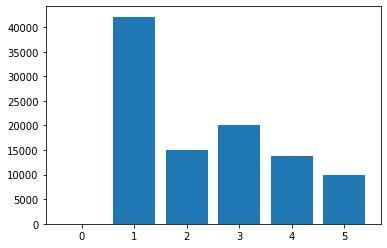

In [16]:
from collections import Counter
from matplotlib import pyplot

# Summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

It turns out that our class target is imbalanced in which class 1 oversampled the other classes. Oversampling refers to copying or synthesizing new examples of the minority classes so that the number of examples in the minority class better resembles or matches the number of examples in the majority classes. 

We use the most widely used approach to synthesizing new examples which is called the Synthetic Minority Oversampling Technique (SMOTE). This approach was first introduced by (Nitesh Chawla, et al, 2002) 

This technique created the synthetic examples rather than by over-sampling with replacement. It opreates in feature space rathern than data space unlike the approach invented by (Ha & Bunke, 1997). 

Class=1, n=42116 (16.667%)
Class=2, n=42116 (16.667%)
Class=3, n=42116 (16.667%)
Class=5, n=42116 (16.667%)
Class=4, n=42116 (16.667%)
Class=0, n=42116 (16.667%)


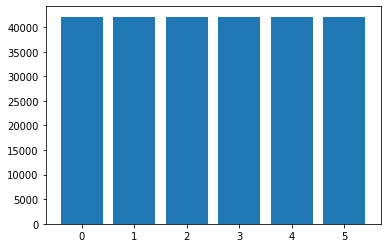

In [17]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

It turns out that our classes are already balanced. It's time to build our models. 

In [18]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 19.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=c2903876d2099e0b823360bbb136995d717c1eb9af7a58a7128214d6dadcc49d
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


**IMPORTING ALL NECESSARY PACKAGES**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tpot import TPOTClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**CROSS VALIDATION AND HYPER-PARAMETER TUNING**

In [20]:
def CrossValidationTuning(model, param_grid, modelType = 'Random_Forest'):
  selector = RFE(model, n_features_to_select = 4, step=1)
  pipeline = Pipeline([("FS", selector), ("classifier",model)])

  scores = []
  preds = []
  actual_labels = []
  # Initialise the 5-fold cross-validation
  kf = StratifiedKFold(n_splits=5,shuffle=True)
  for train_index,test_index in kf.split(X,y):
    # Generate the training and test partitions of X and Y for each iteration of CV	
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Randomized Search Cross Validation is in progress... ")
    grid_search = RandomizedSearchCV(pipeline,param_distributions=param_grid,cv=5,scoring="f1",n_iter=2)
    grid_search.fit(X_train,y_train)

    estimator = grid_search.best_estimator_

    if modelType == 'Random_Forest': 
      print("Max depth {0}".format(estimator.named_steps['classifier'].max_depth))
      print("Number of trees {0}".format(estimator.named_steps['classifier'].n_estimators))
    elif modelType == 'Logistic_Regression':
      print("Number of C {0}".format(estimator.named_steps['classifier'].C))
      print("Number of Max Iteration {0}".format(estimator.named_steps['classifier'].max_iter))
      print("Number of SOlver {0}".format(estimator.named_steps['classifier'].solver))

In [21]:
def fittingEvaluation(model, X_train, y_train, X_test, y_test, modelType='normal'):
  pipe = make_pipeline(StandardScaler(), model)
  pipe.fit(X_train, y_train) 
  print('Accuracy = ', pipe.score(X_test, y_test)) 
  # Predict the results:
  pred_test = pipe.predict(X_test)
  pred_train = pipe.predict(X_train)
  print('Precision = ', precision_score(y_test, pred_test, average='micro'))
  print('Recall = ', recall_score(y_test, pred_test, average='micro'))
  print('f1 = ', f1_score(y_test, pred_test, average='micro'))
  print('f1_train = ', f1_score(y_train, pred_train, average='micro'))


  if modelType == 'normal':
    # Produce the confusion matrix
    cm = confusion_matrix(y_test, pred_test)
    print(cm)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    display.plot()
    plt.show()

**SPLITTING DATA FOR TRAINING AND VALIDATION**

In [22]:
#Transform the dataset into numerical X and y matrices that can be processed by scikit-learn
X = X.values
y = y

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**RANDOM FOREST CLASSIFIER**


Random Forest is built by taking a random sample of our data and then building an ongoing series of decision trees on the subsets. Basically, how many trees we might want depends on how many n_estimators we want to create and Random Forst will take the majority of the trees which say a certain class (as a decision). In theory, the more decision trees that we use with different criteria, the better our random forest classifier will perform because it's essentially increasing the prediction accuracy. 

The benefit of Random forest is that it can help reduce overfitting and bias. It seems that having many decision trees can improve the accuracy but it takes lots of memory space to run and takes time. 

In Random Forest, n_estimators is defined as 100 as a default by scikit learn which means that in our model, we'll have 100 decision trees. Max_depth is defined as None which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples (default = 2 (the minimum number of samples required to split an internal node)). 

We use Gini impurity function to measure the quality of a split. Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. 

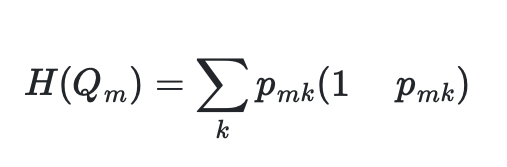



References:
1. https://victorzhou.com/blog/gini-impurity/
2. https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Accuracy =  0.7797491063066391
Precision =  0.7797491063066391
Recall =  0.7797491063066391
f1 =  0.7797491063066391
f1_train =  0.9485038470888194
[[12685     0     0     0     0     0]
 [    2  8652  1435  1250   911   478]
 [    0   923  9011    20  1871   739]
 [    1   720    12 11159    89   719]
 [    0   650  1954   237  8565  1200]
 [    0   456   777  1089  1164  9040]]


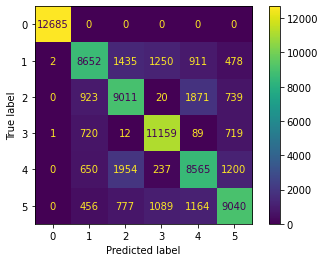

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
fittingEvaluation(rfc, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier and initialise the parameters for its grid search
rfc = RandomForestClassifier()
# Params dictionary of random forest
# param_grid = dict(max_depth=[2,3,4],n_estimators=[50, 100, 200])
param_grid = dict(
        # FS__n_features_to_select=[2,3,4],
        classifier__max_depth=[None,2,4], # None seems always the best
        # classifier__n_estimators=[50,100,200], # Try only 200, 250
        classifier__n_estimators=[200, 250], # Try only 200, 250
        # classifier__n_neighbors=[3,5,10]
)

Here, we will try to tune hyper-parameters using Randomized Grid Search Cross Validation and the iteration is repeated five times using Stratitifed Cross Validation. 

Cross-validation is a statistical method to estimate the performance of machine learning models. It is commonly used to compare and select a model for a given predictive modeling problem because it results in skill estimates that generally have a lower bias than other methods. 

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. 

Stratified Cross Validation is the process of splitting data into k-folds which may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. 

To tune our hyper-parameter, we use Randomized Grid Search Cross Validation because it is 5 times faster than Grid Search Cross Validation which fits in our 100k rows of data. Randomized Grid Search Cross Validation will only test combinations of param grid we define randomly to our dataset. Therefore, it's faster than Grid Search Cross Validation which will try all possibilities of parameters we define. 

References:
1. https://machinelearningmastery.com/k-fold-cross-validation/
2. https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f

In [ ]:
CrossValidationTuning(rfc, param_grid, 'Random_Forest')

If we run the code above, it will tune our hyper-paramaters. Since we use Randomized Grid Search Cross Validation, the best parameters will be different quite a bit because it will choose random rows to fit with our parameter grid we've defined. 

For the first run, it gave us options such as:
1. 200, 4
2. 200, None
3. 50, None
4. 100, None
5. 250, 4

In [26]:
def optimiseRFC(X_train, y_train, X_test, y_test, n_estimators=200, max_depth = 3, class_weight = 'balanced'):
  rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,class_weight=class_weight)
  fittingEvaluation(rfc, X_train, y_train, X_test, y_test)

Accuracy =  0.607803822765107
Precision =  0.607803822765107
Recall =  0.607803822765107
f1 =  0.607803822765107
f1_train =  0.6048889969302436
[[12685     0     0     0     0     0]
 [  680  4850  3204  2598  1371    25]
 [    5   193  7536    31  4736    63]
 [  969   247     3 11401    15    65]
 [   95   140  4485   372  6964   550]
 [  498   188  1922  2945  4332  2641]]


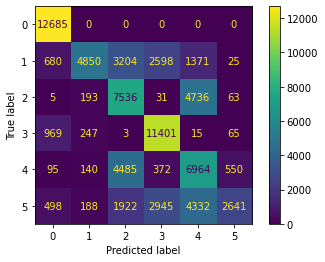

Accuracy =  0.7812660765872126
Precision =  0.7812660765872126
Recall =  0.7812660765872126
f1 =  0.7812660765872126
f1_train =  0.9485095004155195
[[12685     0     0     0     0     0]
 [    2  8636  1470  1253   908   459]
 [    0   943  9017    17  1888   699]
 [    1   701    11 11179    89   719]
 [    0   644  1919   236  8612  1195]
 [    0   442   735  1091  1160  9098]]


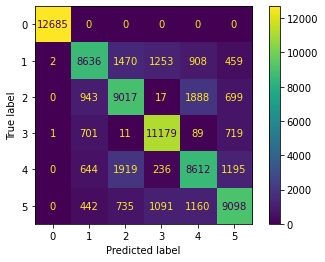

Accuracy =  0.7791027450566556
Precision =  0.7791027450566556
Recall =  0.7791027450566556
f1 =  0.7791027450566556
f1_train =  0.9482664073674154
[[12685     0     0     0     0     0]
 [    3  8650  1460  1264   884   467]
 [    0   949  9004    18  1866   727]
 [    1   728    10 11126   102   733]
 [    0   656  1944   230  8573  1203]
 [    0   468   779  1089  1165  9025]]


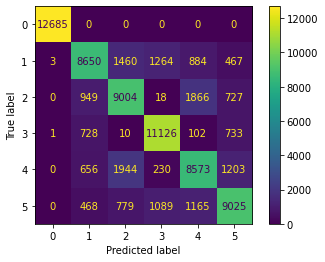

Accuracy =  0.7803690854647864
Precision =  0.7803690854647864
Recall =  0.7803690854647864
f1 =  0.7803690854647864
f1_train =  0.9484925404354192
[[12685     0     0     0     0     0]
 [    2  8622  1477  1276   904   447]
 [    0   951  8987    19  1880   727]
 [    1   713    13 11174    90   709]
 [    0   647  1940   227  8591  1201]
 [    0   445   757  1083  1141  9100]]


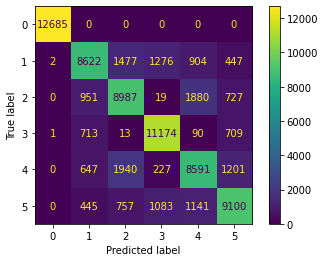

Accuracy =  0.612908757535385
Precision =  0.612908757535385
Recall =  0.612908757535385
f1 =  0.612908757535385
f1_train =  0.6096830179719256
[[12685     0     0     0     0     0]
 [  681  5426  2980  2308  1309    24]
 [    5   292  7563    30  4611    63]
 [  966   273     3 11400    15    43]
 [   92   169  4551   370  6872   552]
 [  473   218  1960  3067  4290  2518]]


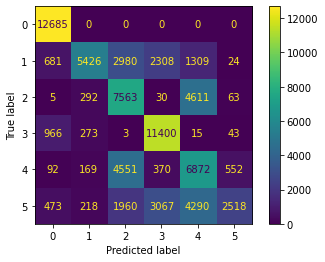

In [28]:
## FIRST EXPERIMENT
optimiseRFC(X_train, y_train, X_test, y_test, 200, 4)
optimiseRFC(X_train, y_train, X_test, y_test, 200, None)
optimiseRFC(X_train, y_train, X_test, y_test, 50, None)
optimiseRFC(X_train, y_train, X_test, y_test, 100, None)
optimiseRFC(X_train, y_train, X_test, y_test, 250, 4)

Accuracy =  0.6093867482752707
Precision =  0.6093867482752707
Recall =  0.6093867482752707
f1 =  0.6093867482752707
f1_train =  0.6068507012951772
[[12685     0     0     0     0     0]
 [  705  5119  3133  2524  1222    25]
 [    6   281  7663    31  4521    62]
 [  953   187     3 11501    15    41]
 [  106   149  4700   379  6731   541]
 [  495   170  2074  3113  4176  2498]]


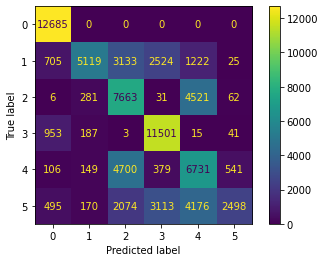

Accuracy =  0.780158028730098
Precision =  0.780158028730098
Recall =  0.780158028730098
f1 =  0.780158028730098
f1_train =  0.9485095004155195
[[12685     0     0     0     0     0]
 [    2  8616  1481  1259   897   473]
 [    0   933  9027    20  1880   704]
 [    1   710    13 11164    96   716]
 [    0   627  1956   229  8585  1209]
 [    0   442   741  1098  1179  9066]]


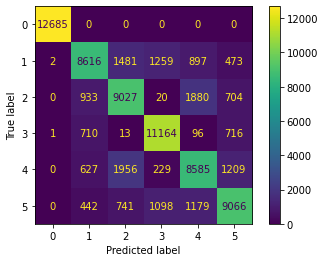

Accuracy =  0.6127900381221227
Precision =  0.6127900381221227
Recall =  0.6127900381221227
f1 =  0.6127900381221227
f1_train =  0.6102031240283344
[[12685     0     0     0     0     0]
 [  631  5351  3061  2286  1374    25]
 [    5   223  7503    31  4739    63]
 [  951   277     3 11411    15    43]
 [   94   144  4473   373  6970   552]
 [  469   207  1917  3061  4337  2535]]


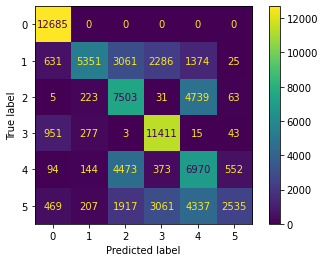

Accuracy =  0.5742458019496366
Precision =  0.5742458019496366
Recall =  0.5742458019496366
f1 =  0.5742458019496366
f1_train =  0.5698383713896442
[[12685     0     0     0     0     0]
 [ 1629  2824  3514  3563  1198     0]
 [   13   154  8115    34  4198    50]
 [ 1206     5     4 11444    14    27]
 [  123   107  5041   394  6440   501]
 [ 1434    90  2274  2700  4003  2025]]


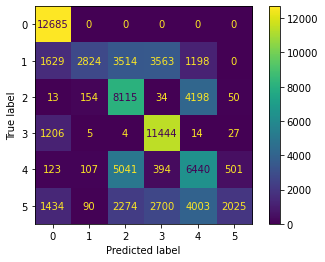

In [27]:
## SECOND EXPERIMENT
optimiseRFC(X_train, y_train, X_test, y_test, 200, 4)
optimiseRFC(X_train, y_train, X_test, y_test, 200, None)
optimiseRFC(X_train, y_train, X_test, y_test, 250, 4)
optimiseRFC(X_train, y_train, X_test, y_test, 250, 2)

For the first run, it shows that the option 200 and None can improve our accuracy of 1% while others decrease our accuracy. 

We tried the second run which gave us the best parameters such as:
1. 200, 4
2. 200, None
3. 250, 4
4. 250, 2

Turns out if we set the n_estimators as 200 and max_depth as None as what we did in the first run, that's the best accuracy we can get. 

We also tried to increase n_estimators out of curiosity, but turns out that it decreases the accuracy score. 

Accuracy =  0.7785619121740163
Precision =  0.7785619121740163
Recall =  0.7785619121740163
f1 =  0.7785619121740163
[[12475     1     0     0     0     0]
 [    4  8644  1464  1206   877   445]
 [    0   970  9163    18  1894   714]
 [    2   745    19 10947   103   709]
 [    0   706  1949   204  8637  1205]
 [    0   447   830  1130  1145  9156]]


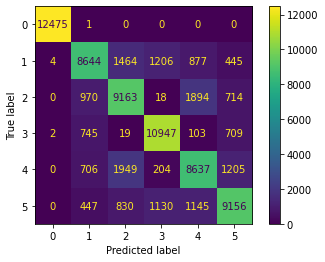

In [ ]:
optimiseRFC(X_train, y_train, X_test, y_test, 250, None)

**LOGISTIC REGRESSION**

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy =  0.6114709335303197
Precision =  0.6114709335303197
Recall =  0.6114709335303197
f1 =  0.6114709335303197
f1_train =  0.6071672875903825
[[12685     0     0     0     0     0]
 [  420  6557  1573  2033  1798   347]
 [    4   965  4664    27  6202   702]
 [  303   816     1 11483    15    82]
 [   61   696  2184   340  8071  1254]
 [  250   830   918  3008  4625  2895]]


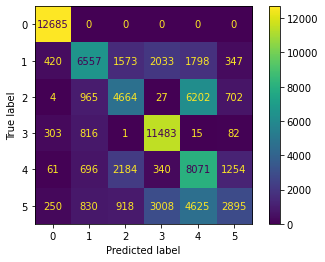

In [29]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
fittingEvaluation(lrc, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(max_iter=150)
# Params dictionary of K-Neighbors Classifier
param_grid = dict(classifier__C=[0.5,1.0,2.0,4.0], classifier__max_iter=[50,100,200], classifier__solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'] )

In [ ]:
CrossValidationTuning(lrc, param_grid, 'Logistic_Regression')

Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Number of C 4.0
Number of Max Iteration 50
Number of SOlver saga
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Number of C 2.0
Number of Max Iteration 100
Number of SOlver liblinear
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Number of C 0.5
Number of Max Iteration 50
Number of SOlver newton-cg
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Number of C 4.0
Number of Max Iteration 200
Number of SOlver saga
Randomized Search Cross Validation is in progress... 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Number of C 4.0
Number of Max Iteration 100
Number of SOlver newton-cg


After running Halving Grid Search Cross Validation to tune our hyper-parameters of our Logistic Regression model, we get values such as: 
1. C is 4.0, max iteration is 50, solver is saga. 
2. C is 2.0, max iteration is 100, solver is liblinear.
3. C is 0.5, max iteration is 50, solver is newton-cg .
4. C is 4.0, max iteration is 200, solver is saga. 
5. C is 4.0, max iteration is 100, solver is newton-cg.

In [ ]:
def optimiseLRC(X_train, y_train, X_test, y_test, C = 2.0, max_iter=100, solver='lbfgs'):
  lrc = LogisticRegression(C=C, max_iter=max_iter, solver=solver)
  fittingEvaluation(lrc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy =  0.6067485390916646
Precision =  0.6067485390916646
Recall =  0.6067485390916646
f1 =  0.6067485390916646
[[12361   115     0     0     0     0]
 [  369  6603  1600  1971  1728   369]
 [    4  1010  4752    22  6342   629]
 [  313   828     3 11257    17   107]
 [   51   772  2259   331  8038  1250]
 [  269   806   920  2996  4731  2986]]


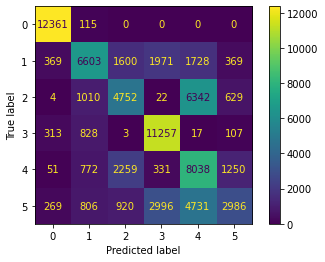

Accuracy =  0.5992692160561411
Precision =  0.5992692160561411
Recall =  0.5992692160561411
f1 =  0.5992692160561411
[[12347   129     0     0     0     0]
 [  397  6383  1792  2022  1894   152]
 [    5  1207  4563    26  6611   347]
 [  334   800     5 11315    17    54]
 [   62   799  2311   336  8195   998]
 [  296   850  1048  3025  4862  2627]]


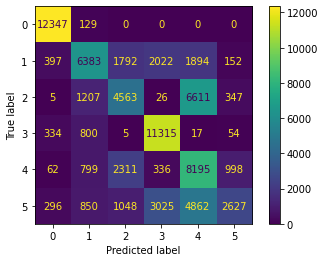

Accuracy =  0.6080280705457136
Precision =  0.6080280705457136
Recall =  0.6080280705457136
f1 =  0.6080280705457136
[[12475     1     0     0     0     0]
 [  374  6603  1600  1965  1726   372]
 [    5  1009  4752    22  6343   628]
 [  331   822     3 11246    17   106]
 [   54   772  2258   330  8039  1248]
 [  284   806   919  2990  4730  2979]]


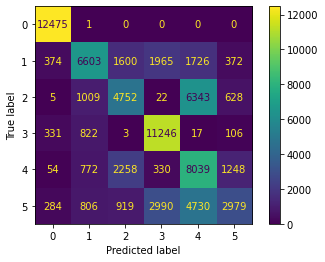

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy =  0.6065902465406482
Precision =  0.6065902465406482
Recall =  0.6065902465406482
f1 =  0.6065902465406482
[[12348   128     0     0     0     0]
 [  369  6604  1600  1971  1727   369]
 [    3  1010  4753    22  6342   629]
 [  314   828     3 11256    17   107]
 [   51   772  2259   331  8038  1250]
 [  269   806   920  2996  4731  2986]]


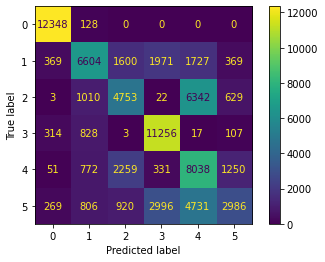

Accuracy =  0.6065902465406482
Precision =  0.6065902465406482
Recall =  0.6065902465406482
f1 =  0.6065902465406482
[[12348   128     0     0     0     0]
 [  369  6604  1600  1971  1727   369]
 [    3  1010  4753    22  6342   629]
 [  314   828     3 11256    17   107]
 [   51   772  2259   331  8038  1250]
 [  269   806   920  2996  4731  2986]]


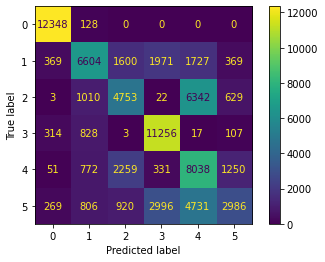

In [ ]:
optimiseLRC(X_train, y_train, X_test, y_test, 4.0, 50, 'saga')
optimiseLRC(X_train, y_train, X_test, y_test, 2.0, 100, 'liblinear')
optimiseLRC(X_train, y_train, X_test, y_test, 0.5, 50, 'newton-cg')
optimiseLRC(X_train, y_train, X_test, y_test, 4.0, 200, 'saga')
optimiseLRC(X_train, y_train, X_test, y_test, 4.0, 100, 'newton-cg')

It turns out that using when we set C is 0.5, max iteration is 50, solver is newton-cg, it improves the performance a little bit from 0.6078961600865332 to 0.6080280705457136 rather than setting the parameters as C is 1.0, max iteration is 100, solver is lbfgs which is the default of scikit learn's Logistic Regression model. 

**TPOT**

TPOT is an open-source library fro performing AutoML in Python which uses Genetic Programming stochastic global search procedure to efficiently discover a top-performing model pipeline for a given dataset.  

TPOT stands for Tree-based Pipeline Optimization Tool. TPOT uses a tree-based structure to represent a model pipeline for a predictive modelling problem, including data preparation and modelling algorithms and model hyperparameters. 

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tpot import TPOTClassifier

estimator = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2,n_jobs=-1, config_dict='TPOT light', subsample=0.2)
fittingEvaluation(estimator, X_train, y_train, X_test, y_test, modelType='TPOT')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6764000383519067

Generation 2 - Current best internal CV score: 0.6764000383519067

Generation 3 - Current best internal CV score: 0.6786614145861091

Generation 4 - Current best internal CV score: 0.6786614145861091

Generation 5 - Current best internal CV score: 0.6786614145861091

Best pipeline: KNeighborsClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=10, min_samples_leaf=18, min_samples_split=6), n_neighbors=21, p=1, weights=distance)
Accuracy =  0.6894432059517999
Precision =  0.6894432059517999
Recall =  0.6894432059517999
f1 =  0.6894432059517999


In [ ]:
estimator = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2,n_jobs=-1, config_dict='TPOT light', subsample=0.2)

scores = []
preds = []
actual_labels = []
# Initialise the 5-fold cross-validation
kf = StratifiedKFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
	# Generate the training and test partitions of X and Y for each iteration of CV	
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	estimator.fit(X_train,y_train)

	# Predicting the test data with the optimised models
	predictions = estimator.predict(X_test)
	score = f1_score(y_test,predictions, average = 'micro')
	scores.append(score)
 
  # Extract the probabiliites of predicting the 2nd class, which will use to generate the PR curve
	probs = estimator.predict_proba(X_test)[:,1]
	preds.extend(probs)
	actual_labels.extend(y_test)
    
# Report the overall F1 score
print("Average F1 score: {0}".format(np.average(scores)))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6777966861188434

Generation 2 - Current best internal CV score: 0.6777966861188434

Generation 3 - Current best internal CV score: 0.6777966861188434

Generation 4 - Current best internal CV score: 0.6820508518219544

Generation 5 - Current best internal CV score: 0.682298189846806

Best pipeline: KNeighborsClassifier(RobustScaler(BernoulliNB(input_matrix, alpha=1.0, fit_prior=True)), n_neighbors=29, p=1, weights=distance)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.678983956962468

Generation 2 - Current best internal CV score: 0.678983956962468

Generation 3 - Current best internal CV score: 0.678983956962468

Generation 4 - Current best internal CV score: 0.6822486206995584

Generation 5 - Current best internal CV score: 0.6842521232352556

Best pipeline: KNeighborsClassifier(MinMaxScaler(input_matrix), n_neighbors=31, p=1, weights=distance)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6772527314796138

Generation 2 - Current best internal CV score: 0.6772527314796138

Generation 3 - Current best internal CV score: 0.6772527314796138

Generation 4 - Current best internal CV score: 0.6774011422466308

Generation 5 - Current best internal CV score: 0.6774011422466308

Best pipeline: KNeighborsClassifier(RobustScaler(CombineDFs(input_matrix, input_matrix)), n_neighbors=29, p=1, weights=distance)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6828672272636365

Generation 2 - Current best internal CV score: 0.6828672272636365

Generation 3 - Current best internal CV score: 0.6856373587006332

Generation 4 - Current best internal CV score: 0.6859094675358481

Generation 5 - Current best internal CV score: 0.6859094675358481

Best pipeline: KNeighborsClassifier(GaussianNB(RobustScaler(input_matrix)), n_neighbors=29, p=1, weights=distance)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.676881628099513

Generation 2 - Current best internal CV score: 0.676881628099513

Generation 3 - Current best internal CV score: 0.6804432724127586

Generation 4 - Current best internal CV score: 0.6804432724127586

Generation 5 - Current best internal CV score: 0.6826198036007197

Best pipeline: KNeighborsClassifier(MaxAbsScaler(input_matrix), n_neighbors=29, p=1, weights=distance)
Average F1 score: 0.688562538964118


TPOT does its own process to tune itself within the call to estimator.fit. It turns out after we use cross validation, our TPOT suggests that KNN is the best pipeline to process our dataset. 